<a href="https://colab.research.google.com/github/khannana/khannana/blob/main/Copy_of_Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/dat/Copy of 50_Startups.csv')

In [ ]:
len(dataset)

50

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.shape

(50, 5)

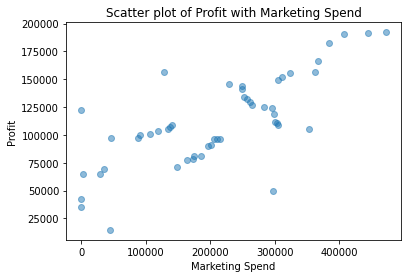

In [ ]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

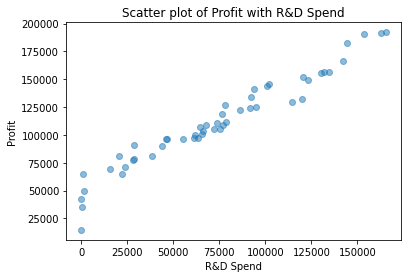

In [ ]:
plt.scatter(dataset["R&D Spend"], dataset["Profit"], alpha = 0.5)
plt.title("Scatter plot of Profit with R&D Spend")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

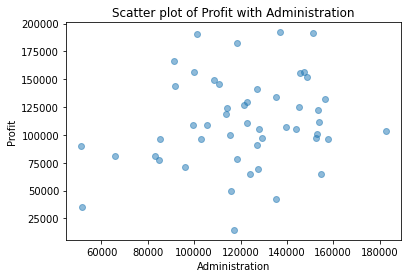

In [ ]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

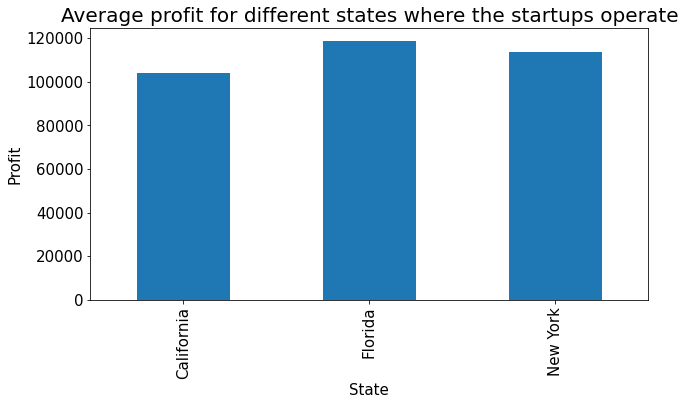

In [ ]:
# Create the figure object 
ax = dataset.groupby(["State"])["Profit"].mean().plot.bar(figsize = (10,5), fontsize = 15)


# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [ ]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
# Create dummy variables for the catgeorical variable State
dataset['NewYork_State'] = np.where(dataset['State']=='New York', 1, 0)
dataset['California_State'] = np.where(dataset['State']=='California', 1, 0)
dataset['Florida_State'] = np.where(dataset['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
dependent_variable = 'Profit'

In [ ]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['California_State',
 'Marketing Spend',
 'NewYork_State',
 'R&D Spend',
 'Administration',
 'Florida_State']

In [ ]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [ ]:
dataset[independent_variables]

,California_State,Marketing Spend,NewYork_State,R&D Spend,Administration,Florida_State
0,0,471784.10,1,165349.20,136897.80,0
1,1,443898.53,0,162597.70,151377.59,0
2,0,407934.54,0,153441.51,101145.55,1
3,0,383199.62,1,144372.41,118671.85,0
4,0,366168.42,0,142107.34,91391.77,1
5,0,362861.36,1,131876.90,99814.71,0
6,1,127716.82,0,134615.46,147198.87,0
7,0,323876.68,0,130298.13,145530.06,1
8,0,311613.29,1,120542.52,148718.95,0
9,1,304981.62,0,123334.88,108679.17,0


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train[0:10]

array([[0.0000000e+00, 2.1463481e+05, 0.0000000e+00, 5.5493950e+04,
        1.0305749e+05, 1.0000000e+00],
       [0.0000000e+00, 2.0551764e+05, 1.0000000e+00, 4.6014020e+04,
        8.5047440e+04, 0.0000000e+00],
       [0.0000000e+00, 1.3405007e+05, 0.0000000e+00, 7.5328870e+04,
        1.4413598e+05, 1.0000000e+00],
       [1.0000000e+00, 2.1079767e+05, 0.0000000e+00, 4.6426070e+04,
        1.5769392e+05, 0.0000000e+00],
       [0.0000000e+00, 2.9491957e+05, 0.0000000e+00, 9.1749160e+04,
        1.1417579e+05, 1.0000000e+00],
       [0.0000000e+00, 3.2387668e+05, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 1.0000000e+00],
       [0.0000000e+00, 2.5651292e+05, 0.0000000e+00, 1.1994324e+05,
        1.5654742e+05, 1.0000000e+00],
       [0.0000000e+00, 1.9039300e+03, 1.0000000e+00, 1.0002300e+03,
        1.2415304e+05, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 5.4205000e+02,
        5.1743150e+04, 0.0000000e+00],
       [0.0000000e+00, 1.0713838e+05,

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.45494286, 0.        , 0.33561668, 0.48655174,
        1.        ],
       [0.        , 0.43561799, 1.        , 0.2782839 , 0.3173015 ,
        0.        ],
       [0.        , 0.28413435, 0.        , 0.45557444, 0.87258866,
        1.        ],
       [1.        , 0.44680961, 0.        , 0.2807759 , 1.        ,
        0.        ],
       [0.        , 0.62511553, 0.        , 0.55488118, 0.59103645,
        1.        ],
       [0.        , 0.68649342, 0.        , 0.7880179 , 0.88568959,
        1.        ],
       [0.        , 0.54370828, 0.        , 0.72539353, 0.98922572,
        1.        ],
       [0.        , 0.0040356 , 1.        , 0.0060492 , 0.6847981 ,
        0.        ],
       [0.        , 0.        , 1.        , 0.00327821, 0.00432296,
        0.        ],
       [0.        , 0.22709197, 1.        , 0.39676926, 0.95618996,
        0.        ]])

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.intercept_

44153.954667848506

In [ ]:
regressor.coef_

array([ 8.66383692e+01,  1.72720281e+04,  7.86007422e+02,  1.27892182e+05,
        3.49927567e+03, -8.72645791e+02])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
#Predicted profit on the test data
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
# Actual profits on test data
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [ ]:
mean_squared_error(y_test, y_pred)

83502864.0325773

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

9031.66661257897

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

9137.99015279494

In [ ]:
r2_score(y_train, y_pred_train)

0.9501847627493607

In [ ]:
r2_score(y_test, y_pred)

0.9347068473282425

In [18]:
a = (23,34,65,20,5)
s = 0
for i in a:
  if i%2==0:
    s = s + i
print(s)

54


In [23]:
p = "1,2,3,4,5"

In [24]:
type(p)

str